In [17]:
import numpy as np
import h5py
import pyrecon.mlem as mlem
import matplotlib.pyplot as plt
import skimage as ski

In [30]:
shape = np.array((114,114))
template = np.zeros(shape)
img=template
disk_mask = template
rr,cc = ski.draw.disk(shape//2, 50, shape=shape)
disk_mask[rr,cc]=1

phantom = np.load("NEMA_IQ-like_phantom_data_114x114.npz")[
    "phantom"
]
phantom_clipped = phantom[rr,cc]
data = np.load("output/"+"2d_det_3x2_fov_114x114.npz")['sysmat']
sysmat = np.reshape(data, (6*144,114,114))
sysmat_clipped = sysmat[:,rr,cc].reshape((6*144,phantom_clipped.shape[0]))
print(phantom_clipped.shape)
print(sysmat_clipped.shape)
projection = mlem.get_forward_projection(sysmat_clipped, phantom_clipped)
projection = np.reshape(projection, 6*144)
np.savez_compressed(
        str("output/" + "NEMA_IQ-like_det_3x2_114x114_proj.npz"),
        projection=projection,
)

(7825,)
(864, 7825)


In [45]:
# Load projection data
proj = numpy.load("output/" + "NEMA_IQ-like_det_3x2_114x114_proj.npz")[
        "projection"
    ]
# sysmat = numpy.reshape(data, (144,114*114))
# Perform reconstruction
niter=1000
out = mlem.reconstruct(sysmat_clipped, proj, niter)
numpy.savez_compressed("output/" + "NEMA_IQ-like_det_3x2_114x114_reconstructed.npz",
    reconstructed=out,
)

Reconstructing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:07

(7825,)


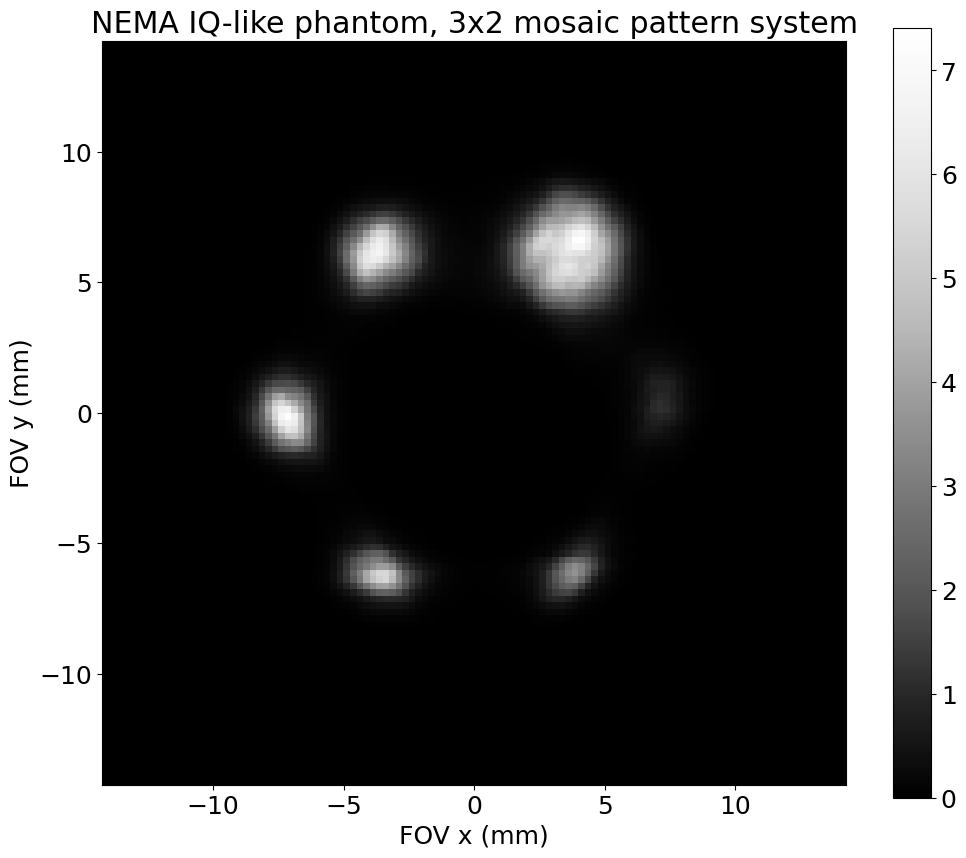

In [49]:
plt.rcParams.update({'font.size': 18})
recon = numpy.load("output/"+"NEMA_IQ-like_det_3x2_114x114_reconstructed.npz")['reconstructed']
img=template
img[rr,cc]=recon
print(recon.shape)
fig,ax = plt.subplots(figsize=(12,10))
plt.colorbar(ax.imshow(img,origin="lower",extent=(-57*0.25,57*0.25,-57*0.25,57*0.25),cmap='Greys_r'))
ax.set_xlabel("FOV x (mm)")
ax.set_ylabel("FOV y (mm)")
ax.set_title("NEMA IQ-like phantom, 3x2 mosaic pattern system")
fig.savefig("output/"+"NEMA_IQ-like_det_3x2_114x114_reconstructed.png")

In [47]:
data = np.load("output/"+"shifted_layer_3x3_114x114.npz")['sysmat']
sysmat = np.reshape(data, (6*144,114,114))
sysmat_clipped = sysmat[:,rr,cc].reshape((6*144,phantom_clipped.shape[0]))
print(phantom_clipped.shape)
print(sysmat_clipped.shape)
projection = mlem.get_forward_projection(sysmat_clipped, phantom_clipped)
projection = np.reshape(projection, 6*144)
np.savez_compressed(
        str("output/" + "NEMA_IQ-like_shifted_layer_3x3_114x114_proj.npz"),
        projection=projection,
)

(7825,)
(864, 7825)


In [48]:
# Load projection data
proj = numpy.load("output/" + "NEMA_IQ-like_shifted_layer_3x3_114x114_proj.npz")[
        "projection"
    ]
# sysmat = numpy.reshape(data, (144,114*114))
# Perform reconstruction
niter=1000
out = mlem.reconstruct(sysmat_clipped, proj, niter)
numpy.savez_compressed("output/" + "NEMA_IQ-like_shifted_layer_3x3_114x114_reconstructed.npz",
    reconstructed=out,
)

Reconstructing ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:07

(7825,)


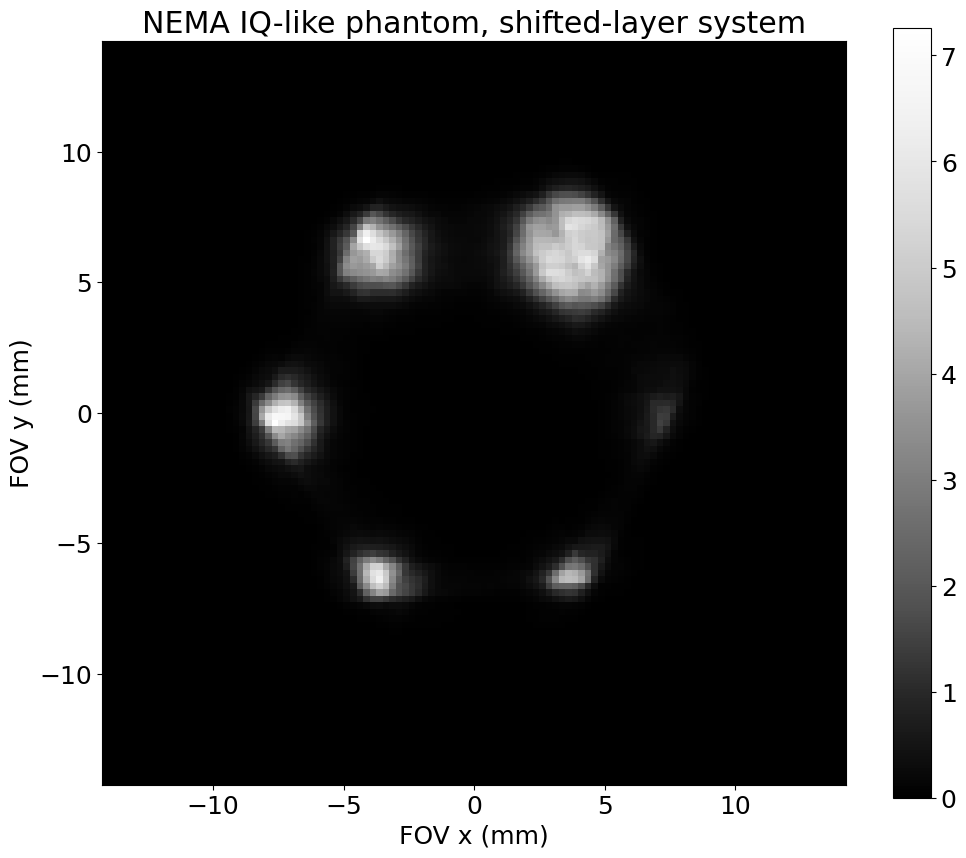

In [53]:
plt.rcParams.update({'font.size': 18})
recon = numpy.load("output/"+"NEMA_IQ-like_shifted_layer_3x3_114x114_reconstructed.npz")['reconstructed']
img=template
img[rr,cc]=recon
print(recon.shape)
fig,ax = plt.subplots(figsize=(12,10))
plt.colorbar(ax.imshow(img,origin="lower",extent=(-57*0.25,57*0.25,-57*0.25,57*0.25),cmap='Greys_r'))
ax.set_xlabel("FOV x (mm)")
ax.set_ylabel("FOV y (mm)")
ax.set_title("NEMA IQ-like phantom, shifted-layer system")
fig.savefig("output/"+"NEMA_IQ-like_shifted_layer_3x3_114x114_reconstructed.png")